In [1]:
# Import packages
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Create function to open .cnv files
def cnv_to_df(file_name):
    
    """
    Open the continuous cast file (.cnv),
    extract the column names,
    find the start of the continuous data
    save the file as a dataframe
    """

    # Open ctd file and read in as a list
    ctdfile = open(file_name)
    ctd_list = ctdfile.readlines()

    # Get column names, ignore #
    col_names = []

    for num, row in enumerate(ctd_list):
        if row.startswith("# name")==True:
             col_names.append(row.split("=")[-1].strip())

        # find start row of data
        elif row.startswith('*END*'):
            row_start = num + 2

        else:
            continue

    # Save file as pandas dataframe
    ctd_df = pd.read_csv(file_name,  
                             skiprows=row_start,
                             delim_whitespace=True,
                             names=col_names)
    return(ctd_df)

In [3]:
#Create dictionary of column names from .cnv file
col_dict = {
'prDM: Pressure, Digiquartz [db]': 'pressure',
 'depSM: Depth [salt water, m]': 'depth',
 't090C: Temperature [ITS-90, deg C]': 'temp',
 'c0mS/cm: Conductivity [mS/cm]': 'conduc',
 't190C: Temperature, 2 [ITS-90, deg C]': 'temp2',
 'c1mS/cm: Conductivity, 2 [mS/cm]': 'conduc2',
 'sbox0Mm/Kg: Oxygen, SBE 43 [umol/kg]': 'oxygen',
 'flECO-AFL: Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]': 'fluoro',
 'CStarTr0: Beam Transmission, WET Labs C-Star [%]': 'beam',
 'par: PAR/Irradiance, Biospherical/Licor': 'par',
 'latitude: Latitude [deg]': 'lat',
 'longitude: Longitude [deg]': 'long',
 'timeJ: Julian Days': 'days',
 'altM: Altimeter [m]': 'alt',
 'spar: SPAR/Surface Irradiance': 'spar',
 'timeS: Time, Elapsed [seconds]': 'time',
 'scan: Scan Count': 'count',
 'flag:  0.000e+00': 'flag'
}


In [4]:
# Open all .cnv files and rename columns
ctd_002_df = cnv_to_df('00202.cnv').rename(columns=col_dict)
ctd_004_df = cnv_to_df('00402.cnv').rename(columns=col_dict)
ctd_006_df = cnv_to_df('00602.cnv').rename(columns=col_dict)
ctd_014_df = cnv_to_df('01402.cnv').rename(columns=col_dict)

In [5]:
# Create function to open *.cap.btl_t files as dataframe
def cap_to_df(file_name):

    """
    Open the bottle summary file, which contains upcast CTD data 
    averaged at each bottle trip. 
    save the file as a dataframe
    """

    ref_temp_df = pd.read_csv(file_name, 
                         delimiter=',', 
                         index_col = 'index_memory')
                        
    return(ref_temp_df )

In [6]:
# Open all .cap.btl_t files
ref_temp_002_df = cap_to_df('00202.cap.btl_t')
ref_temp_004_df = cap_to_df('00402.cap.btl_t')
ref_temp_006_df = cap_to_df('00602.cap.btl_t')
ref_temp_014_df = cap_to_df('01402.cap.btl_t')

In [7]:
# Create funciton to open *.lst file as dataframe, enter column names
def lst_to_df(file_name):
    
    ref_salt_df = pd.read_csv(file_name, 
                         #delimiter=',',
                         skiprows=5,
                          header=0,
                         #index_col = 'samp',
                         delim_whitespace=True,
                         na_values = 'worm',
                         names = ['sta', 'samp',  'cr1', '<1>','cr2', 
                                  '<2>','avgcr', 'salt', 'box', 'sbot', 
                                  'time', 'sby', 'airTmp', 'wtrtmp'])
    return(ref_salt_df)

In [8]:
# Open .all .lst files
ref_salt_002_df = lst_to_df('00202.lst')
ref_salt_004_df = lst_to_df('00402.lst')
ref_salt_006_df = lst_to_df('00602.lst')
ref_salt_014_df = lst_to_df('01402.lst')

In [9]:
# Open bottle summary file and extract column names
bot_file = open('00202.btl')
bot_list = bot_file.readlines()

bot_col_name = []
bot_list_strip = []

# get start row num
for num, row in enumerate(bot_list):
    if row.strip().startswith('Bottle')==True:
         row_start = num + 2
         bot_col_name.append(row.strip())
        
    else:
        bot_list_strip.append(row.strip())
        
#bot_col_name

In [10]:
# Import .bot into pandas dataframe
### Still working on this - dataframe is incorrect due to linebreaks within rows 
bot_002_df = pd.read_csv('00202.btl',
                         skiprows=row_start,
                         delim_whitespace=True)
                         

# Add column names
#bot_002_df.rename(columns = {'col_names'}, inplace = True)
#bot_002_df

''

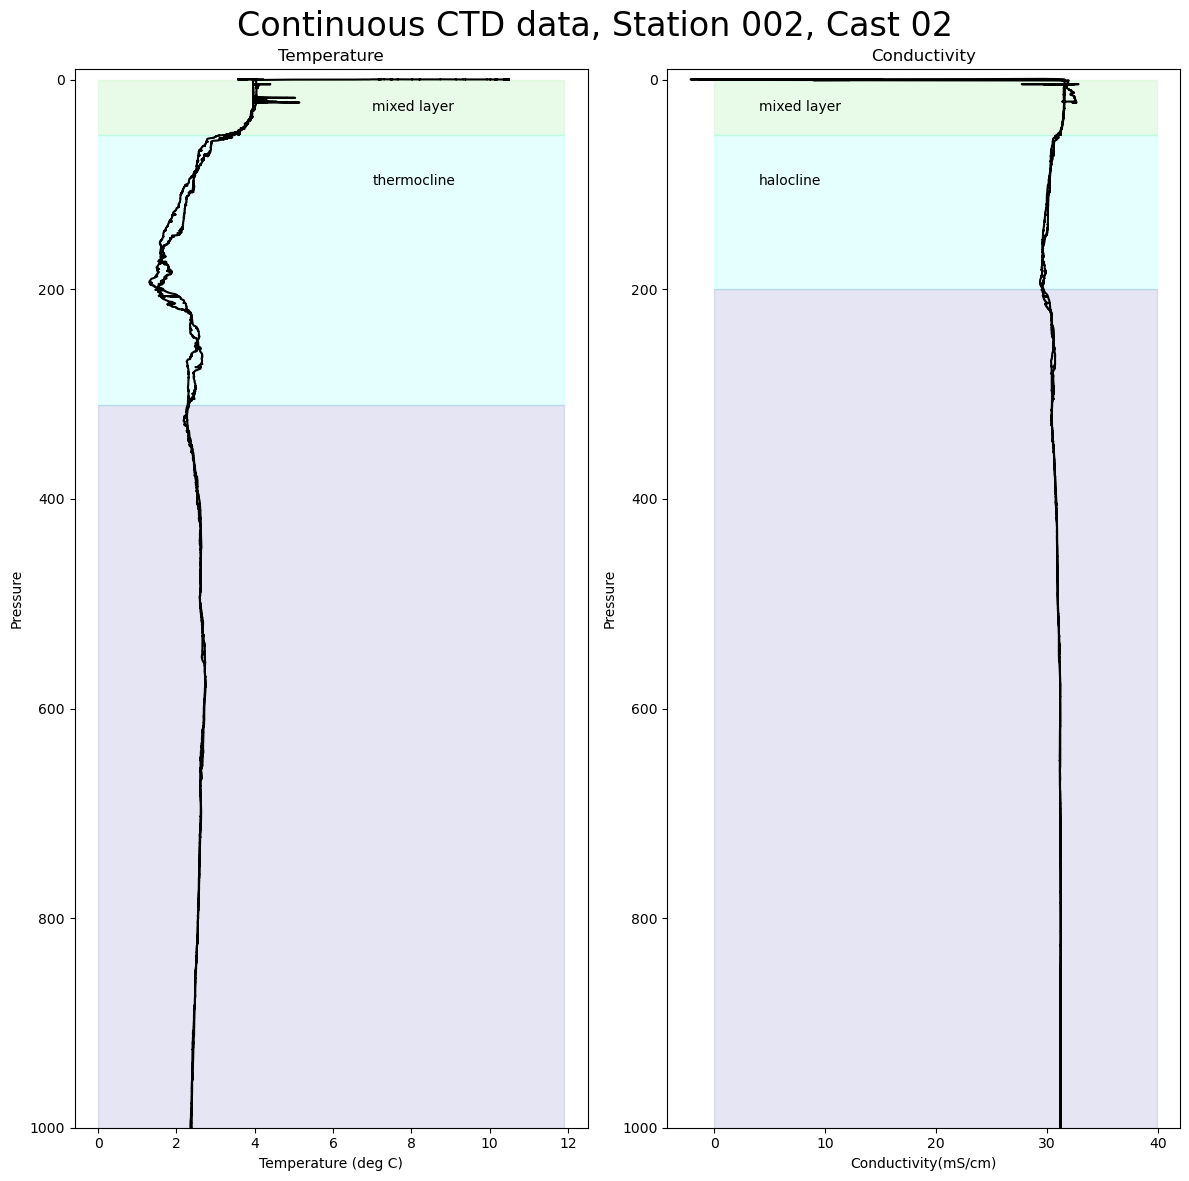

In [11]:
## Plot continuous CTD data from station 002

# Define plot space with 2 sublots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 12))

# Set figure title
fig.suptitle('Continuous CTD data, Station 002, Cast 02', 
             fontsize = 24)


# Subplot 1 - CTD data 002, temp
ctd_002_df.plot(x='temp',
                y='pressure',
                ax=ax1,
                color='black',
                legend=None,
                ylim=[-10, 1000],
                #xlim=['0', '6'],
                title="Temperature",
                xlabel="Temperature (deg C)",
                ylabel="Pressure")

# Subplot 2 - CTD data 002, conductivity
ctd_002_df.plot(x='conduc',
                y='pressure',
                ax=ax2,
                color='black',
                #marker="o",
                legend=None,
                ylim=[-10, 1000],
                #xlim=['20', '30'],
                title="Conductivity",
                xlabel="Conductivity(mS/cm)",
                ylabel="Pressure")

ax1.invert_yaxis()
ax2.invert_yaxis()

# Shade mixed layer
x1=np.arange(0,12,0.1)
x2=np.arange(0,40,0.1)
ax1.fill_between(x1, 53, color='lightgreen', alpha=0.2)
ax2.fill_between(x2, 53, color='lightgreen', alpha=0.2)

# Shade thermocline and halocline
ax1.fill_between(x1, 53, 310, color='cyan', alpha=0.1)
ax2.fill_between(x2, 53, 200, color='cyan', alpha=0.1)

# Shade to bottom
ax1.fill_between(x1, 310, 2000, color='darkblue', alpha=0.1)
ax2.fill_between(x2, 200, 2000, color='darkblue', alpha=0.1)

# Add labels
ax1.text(7, 30, 'mixed layer')
ax1.text(7, 100, 'thermocline')

ax2.text(4, 30, 'mixed layer')
ax2.text(4, 100, 'halocline')
fig.tight_layout()
;

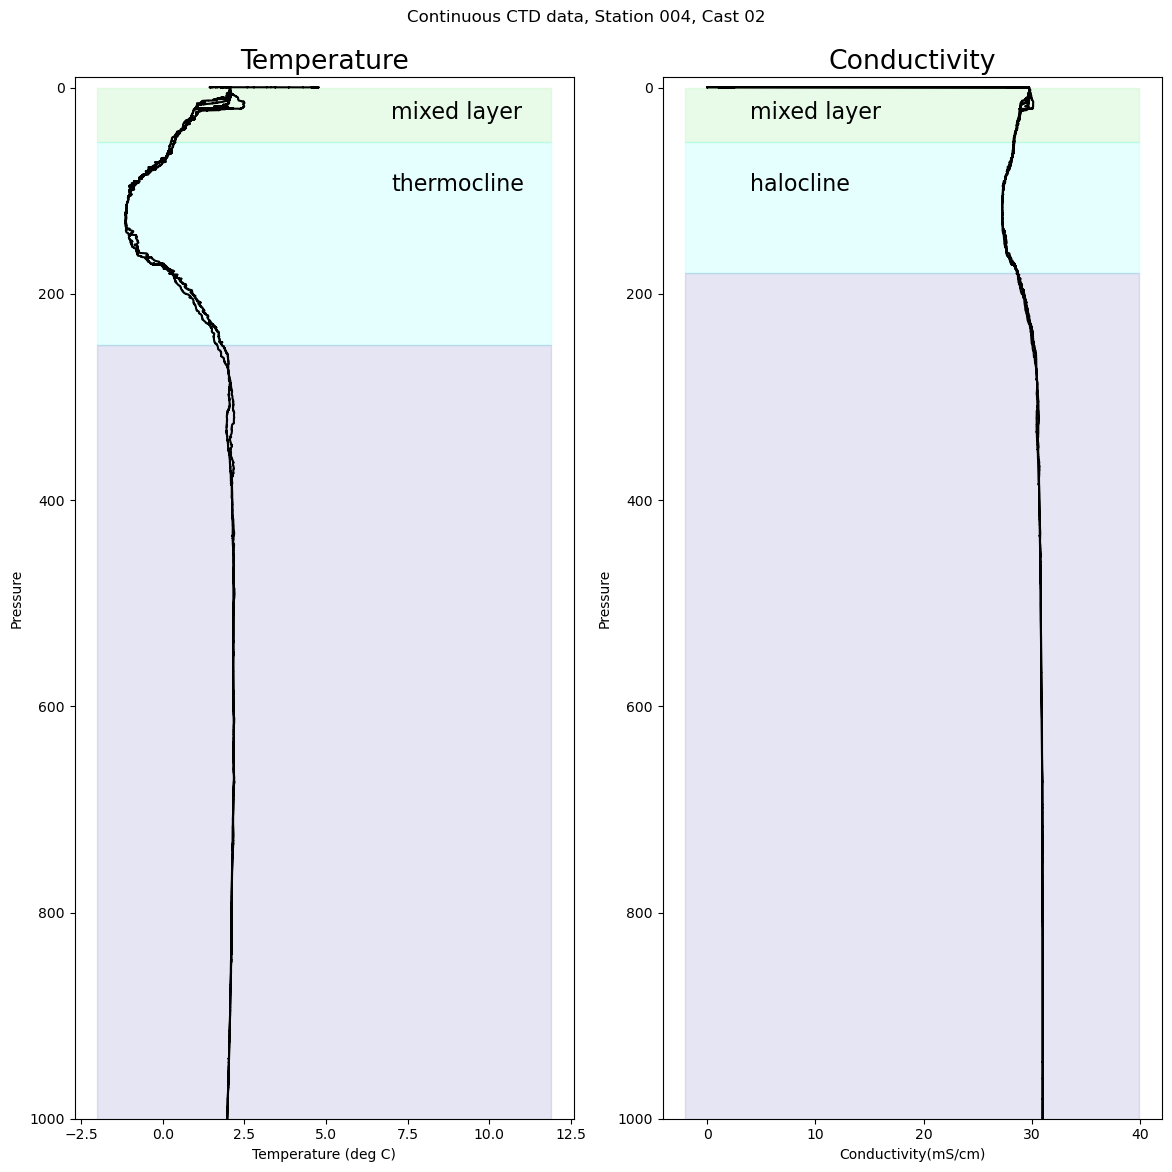

In [12]:
## Plot continuous CTD data from station 004

# Define plot space with 2 sublots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 12))

# Set figure title
fig.suptitle('Continuous CTD data, Station 004, Cast 02') 
             #fontsize = 24)

plt.rcParams['font.size'] = '16'

# Subplot 1 - CTD data 002, temp
ctd_004_df.plot(x='temp',
                y='pressure',
                ax=ax1,
                color='black',
                legend=None,
                ylim=[-10, 1000],
                #xlim=['0', '6'],
                title="Temperature",
                xlabel="Temperature (deg C)",
                ylabel="Pressure")

# Subplot 2 - CTD data 002, conductivity
ctd_004_df.plot(x='conduc',
                y='pressure',
                ax=ax2,
                color='black',
                #marker="o",
                legend=None,
                ylim=[-10, 1000],
                #xlim=['20', '30'],
                title="Conductivity",
                xlabel="Conductivity(mS/cm)",
                ylabel="Pressure")

ax1.invert_yaxis()
ax2.invert_yaxis()

# Shade mixed layer
x1=np.arange(-2,12,0.1)
x2=np.arange(-2,40,0.1)
ax1.fill_between(x1, 53, color='lightgreen', alpha=0.2)
ax2.fill_between(x2, 53, color='lightgreen', alpha=0.2)

# Shade thermocline and halocline
ax1.fill_between(x1, 53, 250, color='cyan', alpha=0.1)
ax2.fill_between(x2, 53, 180, color='cyan', alpha=0.1)

# Shade to bottom
ax1.fill_between(x1, 250, 2000, color='darkblue', alpha=0.1)
ax2.fill_between(x2, 180, 2000, color='darkblue', alpha=0.1)

# Add labels
ax1.text(7, 30, 'mixed layer')
ax1.text(7, 100, 'thermocline')

ax2.text(4, 30, 'mixed layer')
ax2.text(4, 100, 'halocline')
fig.tight_layout();